<a href="https://colab.research.google.com/github/riya0999/CODSOFT/blob/main/Sales_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data shape: (1000, 7)
     TV_Spend  Social_Spend  Radio_Spend Age_Group Region   Platform  \
0   89.934283     80.990332    23.248217     25-34  South   Facebook   
1   77.234714     73.869505    28.554813       50+   West  Instagram   
2   92.953771     60.894456    22.075801     25-34   East      Radio   
3  110.460597     50.295948    26.920385     25-34  North    YouTube   
4   75.316933     70.473350    11.063853     18-24   West         TV   

        Sales  
0  698.710864  
1  488.171262  
2  460.937801  
3  628.114851  
4  481.841849  
          TV_Spend  Social_Spend  Radio_Spend        Sales
count  1000.000000   1000.000000  1000.000000  1000.000000
mean     80.386641     61.062544    30.058342   508.709110
std      19.584319     14.961816     9.834543   112.126184
min      15.174653     15.894170    -0.195122   230.333464
25%      67.048194     50.906375    23.520004   431.684771
50%      80.506012     60.946157    29.997492   497.602931
75%      92.958878     70.933233    

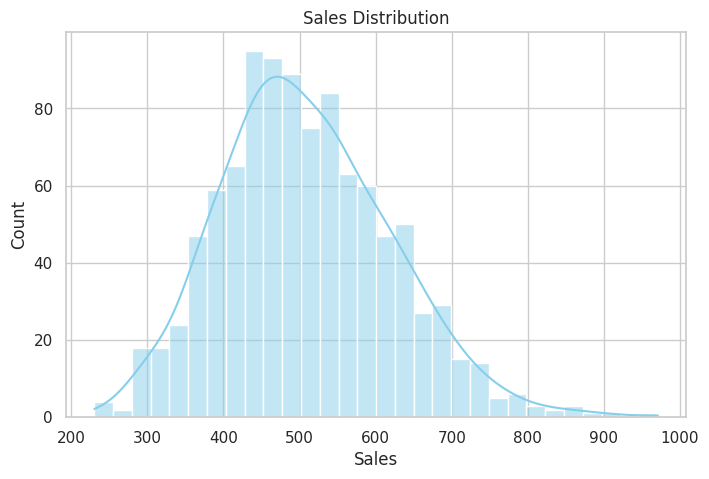

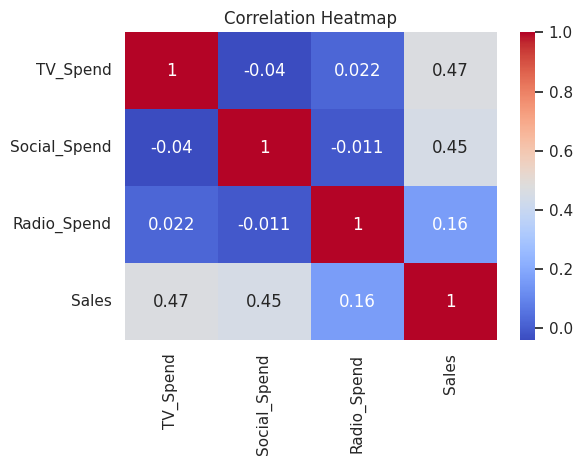

Linear Regression Results:
  RMSE: 25.25
  R²: 0.9491
------------------------------
Random Forest Results:
  RMSE: 42.49
  R²: 0.8560
------------------------------


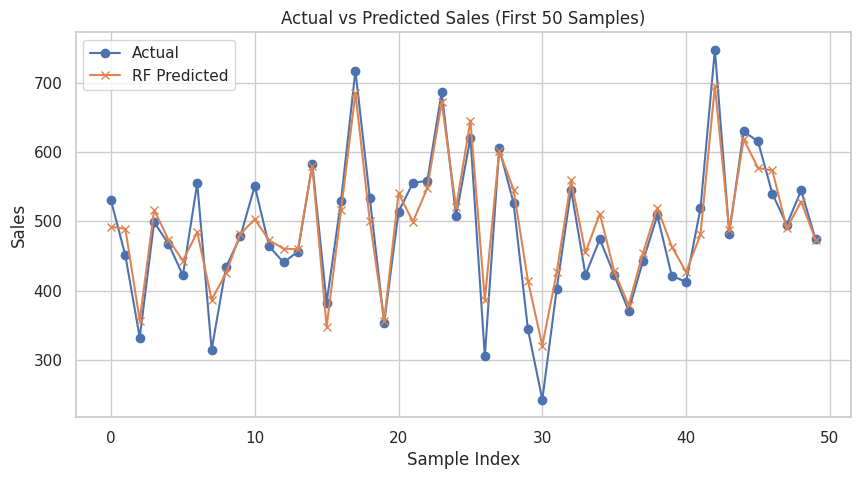

Predicted Sales for custom strategy: $729.69

Business Insights & Recommendations:

1. Invest more in Social Media ads for age group 25-34, especially on Instagram and YouTube.
2. South region shows higher engagement; prioritize this region for ad campaigns.
3. Consider reducing Radio budget for better ROI.
4. Random Forest model captures complex ad-sales patterns; ideal for future prediction tasks.
5. Use the simulation function to plan and test different ad strategies before deployment.



In [1]:
# ---------------------------------------
# AdWise - Sales Prediction using ML
# ---------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
np.random.seed(42)

# Generate synthetic sales data
def generate_sales_data(n=1000):
    tv = np.random.normal(80, 20, n)
    social = np.random.normal(60, 15, n)
    radio = np.random.normal(30, 10, n)

    age_group = np.random.choice(['18-24', '25-34', '35-50', '50+'], size=n)
    region = np.random.choice(['North', 'South', 'East', 'West'], size=n)
    platform = np.random.choice(['YouTube', 'Instagram', 'Facebook', 'TV', 'Radio'], size=n)

    sales = (
        2.4 * tv +
        3.1 * social +
        1.7 * radio +
        np.random.normal(0, 20, n)
    )

    age_mod = {'18-24': 1.15, '25-34': 1.2, '35-50': 1.05, '50+': 0.95}
    region_mod = {'North': 1.0, 'South': 1.1, 'East': 0.98, 'West': 0.92}
    platform_mod = {'YouTube': 1.2, 'Instagram': 1.15, 'Facebook': 1.05, 'TV': 1.1, 'Radio': 0.9}

    for i in range(n):
        sales[i] *= age_mod[age_group[i]]
        sales[i] *= region_mod[region[i]]
        sales[i] *= platform_mod[platform[i]]

    df = pd.DataFrame({
        'TV_Spend': tv,
        'Social_Spend': social,
        'Radio_Spend': radio,
        'Age_Group': age_group,
        'Region': region,
        'Platform': platform,
        'Sales': sales
    })

    return df

df = generate_sales_data()

# Basic data checks and visualization
print("Data shape:", df.shape)
print(df.head())
print(df.describe())

plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=30, kde=True, color='skyblue')
plt.title("Sales Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(df[['TV_Spend', 'Social_Spend', 'Radio_Spend', 'Sales']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Age_Group', 'Region', 'Platform'], drop_first=True)

# Split data
X = df_encoded.drop('Sales', axis=1)
y = df_encoded['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluate models
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Results:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.4f}")
    print("-" * 30)

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(rf_pred[:50], label='RF Predicted', marker='x')
plt.title("Actual vs Predicted Sales (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

# Function to predict sales from user input
def predict_sales(tv, social, radio, age_group, region, platform):
    input_dict = {
        'TV_Spend': tv,
        'Social_Spend': social,
        'Radio_Spend': radio
    }

    for col in df_encoded.columns:
        if 'Age_Group_' in col or 'Region_' in col or 'Platform_' in col:
            input_dict[col] = 0

    if f'Age_Group_{age_group}' in input_dict:
        input_dict[f'Age_Group_{age_group}'] = 1
    if f'Region_{region}' in input_dict:
        input_dict[f'Region_{region}'] = 1
    if f'Platform_{platform}' in input_dict:
        input_dict[f'Platform_{platform}'] = 1

    input_df = pd.DataFrame([input_dict])
    prediction = rf.predict(input_df)[0]
    return prediction

# Example prediction
result = predict_sales(tv=100, social=70, radio=40, age_group='25-34', region='South', platform='Instagram')
print(f"Predicted Sales for custom strategy: ${result:.2f}")

# Business insights
print("\nBusiness Insights & Recommendations:")
print("""
1. Invest more in Social Media ads for age group 25-34, especially on Instagram and YouTube.
2. South region shows higher engagement; prioritize this region for ad campaigns.
3. Consider reducing Radio budget for better ROI.
4. Random Forest model captures complex ad-sales patterns; ideal for future prediction tasks.
5. Use the simulation function to plan and test different ad strategies before deployment.
""")
